### Simulating a mortgage portfolio (I)

Mortgages typically have a lineair interest rate model - where the monthly prepayment is fixed, or use an annualized schema - in which interest plus prepayment makes a fixed amount per month. To start, we model all mortgages with the lineair interest rate model.

See also: https://riskatwork.nl/wp-content/uploads/2019/11/RAW-MortgagePrepayments.pdf

Customers normally have the option to re-pay the mortgage earlier then the maturity / repricing data.  In general a bank loan may not be held until maturity because:
* Customers repay the loan early (as a percentage of the loan, or fully when moving)
* Customers can default on the loan - forcing the bank to write off the loan

Growth and new business 
Customers can choose the fixed interest period they select. Their choice will be influenced by market expectations, and the rates offered by the bank. 

In [6]:
name=input('Enter your Name: ')
print (f'hello {name}')


hello Irina


In [4]:
print (x)

hello


In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import seaborn as sns
from  src.visualization import visualize
from  src.data import make_dataset
from  src.models.bank_model import Bankmodel
from  src.data.interest import Interest

from dateutil.parser import parse
import numpy as np
import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Interest data on mortgages have been downloaded from the dutch central bank statistics site. 

https://www.dnb.nl/statistieken/data-zoeken/#/details/deposito-s-en-leningen-van-mfi-s-aan-huishoudens-rentepercentages-gecorrigeerd-voor-breuken-maand/dataset/efba2d4e-fb53-49a8-a1fe-d5ee3263e14c/resource/8d3ccc86-8396-43b8-a18b-5ba293f01c1d


In [2]:
interest = Interest()
interest.read_data()
interest.df.head()

2023-03-17 15:36:02.042 | INFO     | src.data.dataset:read_data:26 - reading interest data from ESW.


,fixed_period,interest
period,,
2010-06-01,1>5 years,4.45
2010-06-01,5>10 years,4.83
2010-06-01,<= 1 year,3.60
2010-06-01,>10 years,5.12
2010-07-01,1>5 years,4.41


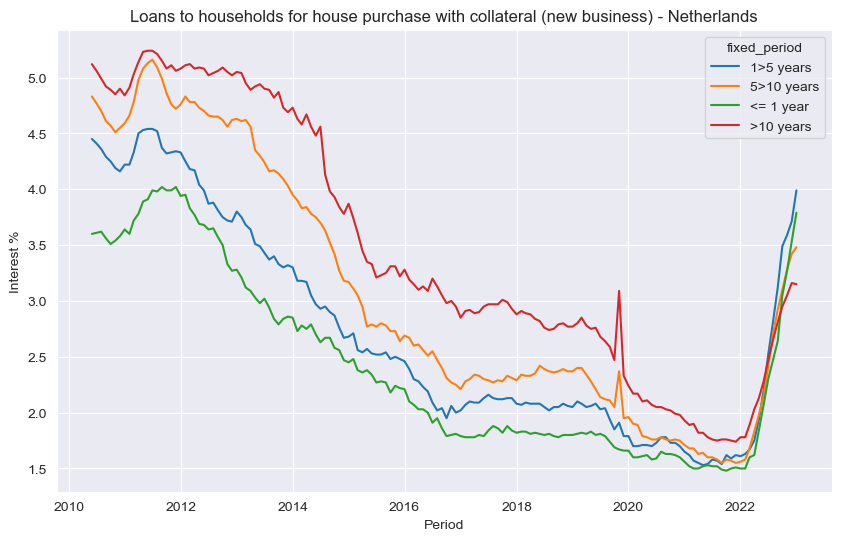

In [3]:
interest.lineplot()

In [5]:
principal = 300000
interest_rate = 0.02
years = 30
fixed_period = 10
x = make_dataset.generate_mortgage_cashflow(principal, interest_rate, years, fixed_period)
x

,period,cashflow
0,0,-300000.000000
1,1,1333.333333
2,2,1331.944444
3,3,1330.555556
4,4,1329.166667
...,...,...
116,116,1173.611111
117,117,1172.222222
118,118,1170.833333
119,119,1169.444444


In [11]:
pos_date = parse('28-02-2023')
bankmodel = Bankmodel(pos_date)
n = 150


In [12]:
df = bankmodel.generate_mortgage_contracts(n, interest.df)

2023-03-17 15:40:58.787 | INFO     | src.data.assets:generate_mortgage_contracts:111 - Added 150 mortgages to our portfolio.
2023-03-17 15:41:01.580 | INFO     | src.data.assets:generate_mortgage_contracts:115 - Added 28014 cashflows to our model.


In [13]:

df.head()

,category,fixed_period,years,start_date,principal,period,interest,contract
0,3,>10 years,20,2006-04-25,200000,2006-04-01,3.15,0
1,3,>10 years,20,2016-01-27,200000,2016-01-01,3.28,1
2,1,1>5 years,5,2021-04-20,200000,2021-04-01,1.55,2
3,3,>10 years,20,2020-04-20,200000,2020-04-01,2.10,3
4,3,>10 years,20,2014-04-24,200000,2014-04-01,4.67,4


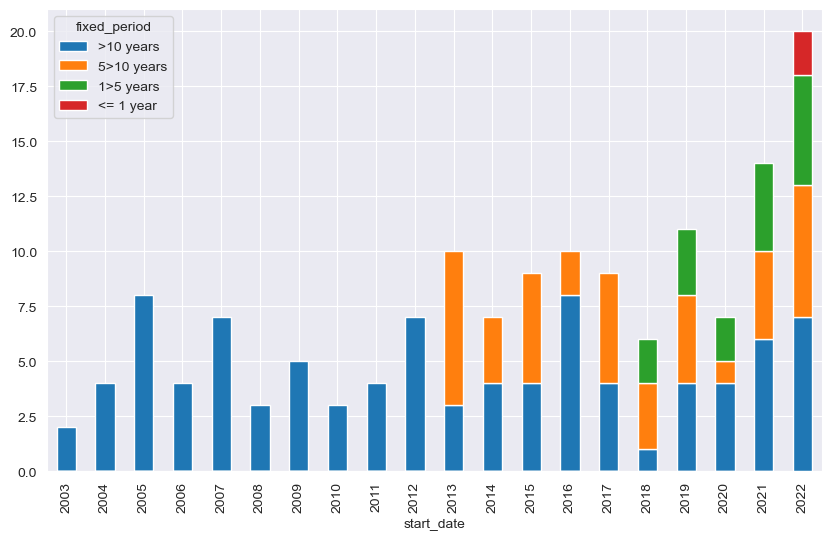

In [16]:
bankmodel.plot_contracts();

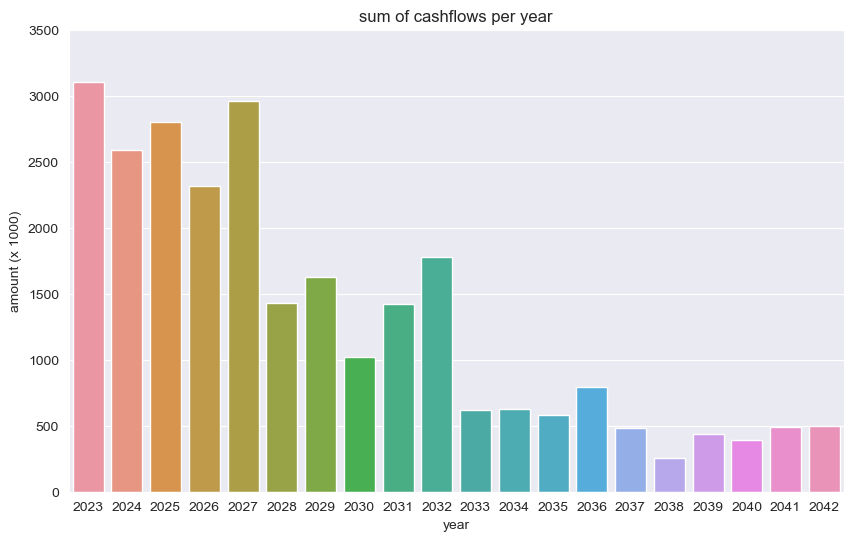

In [17]:
bankmodel.plot_cashflows()